In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#setting default values
S = 110.0 #spot
K = 100.0 #strike
r = 0.05 #risk-free rate
sigma = 0.2 #volatility
T = 1 #time to maturity

# Option pricing and its greeks

In [3]:
#defining funtions to calculate the prices of the options and its greeks
def black_scholes_call(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N = norm.cdf
    n = norm.pdf
    delta = N(d1)
    gamma = n(d1) / (S * sigma * np.sqrt(T))
    vega = S * n(d1) * np.sqrt(T)
    theta = -(S * n(d1) * sigma / (2 * np.sqrt(T))) - (r * K * np.exp(-r * T) * N(d2))
    rho = K * T * np.exp(-r * T) * N(d2)
    price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return {'price': price, 'delta': delta, 'gamma': gamma, 'vega': vega, 'theta': theta, 'rho': rho}

def black_scholes_put(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N = norm.cdf
    n = norm.pdf
    delta = -N(-d1)
    gamma = n(d1) / (S * sigma * np.sqrt(T))
    vega = S * n(d1) * np.sqrt(T)
    theta = -(S * n(d1) * sigma / (2 * np.sqrt(T))) + (r * K * np.exp(-r * T) * N(-d2))
    rho = -K * T * np.exp(-r * T) * N(-d2)
    price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return {'price': price, 'delta': delta, 'gamma': gamma, 'vega': vega, 'theta': theta, 'rho': rho}


In [4]:
#option pricing
call = black_scholes_call(S, K, r, sigma, T)
put = black_scholes_put(S, K, r, sigma, T)

#print results in a table
print('Option Greeks:')
print(f"|{'':<6}|{'Price':<12}|{'Delta':<12}|{'Gamma':<12}|{'Vega':<12}|{'Theta':<12}|{'Rho':<12}|")
print(f"|{'Call':<6}|{call['price']:>12.4f}|{call['delta']:>12.4f}|{call['gamma']:>12.4f}|{call['vega']:>12.4f}|{call['theta']:>12.4f}|{call['rho']:>12.4f}|")
print(f"|{'Put':<6}|{put['price']:>12.4f}|{put['delta']:>12.4f}|{put['gamma']:>12.4f}|{put['vega']:>12.4f}|{put['theta']:>12.4f}|{put['rho']:>12.4f}|")



Option Greeks:
|      |Price       |Delta       |Gamma       |Vega        |Theta       |Rho         |
|Call  |     17.6630|      0.7958|      0.0129|     31.1854|     -6.6120|     69.8700|
|Put   |      2.7859|     -0.2042|      0.0129|     31.1854|     -1.8559|    -25.2529|


# Option P/L plotting

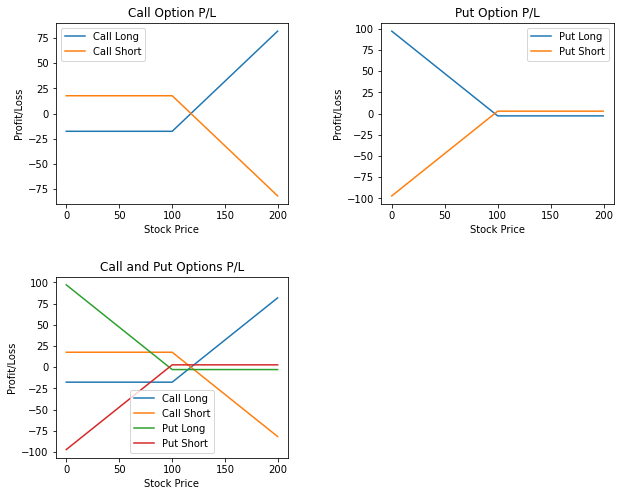

In [5]:
Sr = np.arange(0, 200, 0.5)  #stock price range

#calculate option payoffs
call_long_payoff = [max(s - K, 0) for s in Sr]
call_short_payoff = [-max(s - K, 0) for s in Sr]
put_long_payoff = [max(K - s, 0) for s in Sr]
put_short_payoff = [-max(K - s, 0) for s in Sr]

#calculate P/L for each option
call_long_pl = [payoff - call['price'] for payoff in call_long_payoff]
call_short_pl = [payoff + call['price'] for payoff in call_short_payoff]
put_long_pl = [payoff - put['price'] for payoff in put_long_payoff]
put_short_pl = [payoff + put['price'] for payoff in put_short_payoff]

#plotting P/L graphs
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axs[0, 0].plot(Sr, call_long_pl, label='Call Long')
axs[0, 0].plot(Sr, call_short_pl, label='Call Short')
axs[0, 0].set_title('Call Option P/L')
axs[0, 0].set_xlabel('Stock Price')
axs[0, 0].set_ylabel('Profit/Loss')
axs[0, 0].legend()

axs[0, 1].plot(Sr, put_long_pl, label='Put Long')
axs[0, 1].plot(Sr, put_short_pl, label='Put Short')
axs[0, 1].set_title('Put Option P/L')
axs[0, 1].set_xlabel('Stock Price')
axs[0, 1].set_ylabel('Profit/Loss')
axs[0, 1].legend()

axs[1, 0].plot(Sr, call_long_pl, label='Call Long')
axs[1, 0].plot(Sr, call_short_pl, label='Call Short')
axs[1, 0].plot(Sr, put_long_pl, label='Put Long')
axs[1, 0].plot(Sr, put_short_pl, label='Put Short')
axs[1, 0].set_title('Call and Put Options P/L')
axs[1, 0].set_xlabel('Stock Price')
axs[1, 0].set_ylabel('Profit/Loss')
axs[1, 0].legend()

axs[1, 1].axis('off')
plt.show()
